In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np


import seaborn as sns

import plotly.graph_objects as go

import functools

I created the **python_visualizations** environment with Anaconda for this exercise. 

# Import The Data

In [18]:
# Read in S&P 500 and Campbell Soup Company Data

cpb = pd.read_csv('supporting_files/CPB.csv')
s_and_p = pd.read_csv('supporting_files/^GSPC.csv')

Year-To_Date (YTD) Historical Data Sources:

Campbell Soup Company (CPB): https://finance.yahoo.com/quote/CPB/history?p=CPB&.tsrc=fin-srch

S&P 500 (^GSPC): https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC

In [3]:
#The CPB data frame header

cpb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-21,40.430000,40.549999,39.340000,39.520000,38.147472,2443500
1,2018-11-23,39.619999,40.689999,39.529999,40.529999,39.122398,1369500
2,2018-11-26,40.529999,40.529999,38.790001,39.020000,37.664841,5348400
3,2018-11-27,39.049999,39.529999,38.889999,39.509998,38.137821,2306900
4,2018-11-28,39.500000,39.700001,39.090000,39.500000,38.128170,2284900


In [4]:
#The S&P 500 data frame header

s_and_p.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-21,2657.739990,2670.729980,2649.820068,2649.929932,2649.929932,3233550000
1,2018-11-23,2633.360107,2647.550049,2631.090088,2632.560059,2632.560059,1651650000
2,2018-11-26,2649.969971,2674.350098,2649.969971,2673.449951,2673.449951,3443950000
3,2018-11-27,2663.750000,2682.530029,2655.889893,2682.169922,2682.169922,3485220000
4,2018-11-28,2691.449951,2744.000000,2684.379883,2743.790039,2743.790039,3951670000


In [5]:
# # Convert data frames to string type

# cpb.Date = cpb.Date.astype(str)
# sandp500.Date = sandp500.Date.astype(str)

# Matplotlib

In [6]:
# https://stackoverflow.com/questions/42373104/since-matplotlib-finance-has-been-deprecated-how-can-i-use-the-new-mpl-finance/54368690#54368690

#Run the following line once
#!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

In [7]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

# from matplotlib.finance import candlestick_ohlc
from mpl_finance import candlestick_ohlc

# Import with volume
from mpl_finance import volume_overlay3

import urllib
import datetime as dt

from matplotlib.pyplot import figure
%matplotlib inline

In [8]:
# Make copies of the data frames

cpb_mpl = cpb.copy()
s_and_p_mpl = s_and_p.copy()

In [9]:
cpb_mpl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-21,40.430000,40.549999,39.340000,39.520000,38.147472,2443500
1,2018-11-23,39.619999,40.689999,39.529999,40.529999,39.122398,1369500
2,2018-11-26,40.529999,40.529999,38.790001,39.020000,37.664841,5348400
3,2018-11-27,39.049999,39.529999,38.889999,39.509998,38.137821,2306900
4,2018-11-28,39.500000,39.700001,39.090000,39.500000,38.128170,2284900


In [10]:
type(cpb_mpl.Date[0])

str

In [11]:
# Convert Date column to Matplotlib's float format

# https://matplotlib.org/3.1.1/api/dates_api.html#matplotlib.dates.date2num

import matplotlib.dates as dates
cpb_mpl.Date = dates.datestr2num(cpb_mpl.Date)
s_and_p_mpl.Date = dates.datestr2num(s_and_p_mpl.Date)

In [12]:
type(cpb.Date[0])

str

In [13]:
# https://stackoverflow.com/a/9762084

cpb_subset = cpb_mpl[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
cpb_list = [list(x) for x in cpb_subset.values]
# cpb_list = [i for sub in cpb_list for i in sub]

sandp500_subset = s_and_p_mpl[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
sandp500_list = [list(x) for x in sandp500_subset.values]
# sandp500_list = [i for sub in sandp500_list for i in sub]

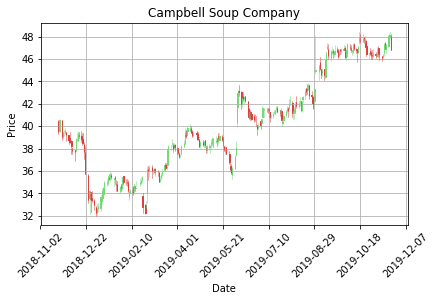

In [19]:
# https://pythonprogramming.net/candlestick-ohlc-graph-matplotlib-tutorial/

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

candlestick_ohlc(ax1, cpb_list, width=0.4, colorup='#77d879', colordown='#db3f3f')

for label in ax1.xaxis.get_ticklabels():
     label.set_rotation(45)

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1.grid(True)


plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Campbell Soup Company')
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()

# Seaborn

In [22]:
cpb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-21,40.430000,40.549999,39.340000,39.520000,38.147472,2443500
1,2018-11-23,39.619999,40.689999,39.529999,40.529999,39.122398,1369500
2,2018-11-26,40.529999,40.529999,38.790001,39.020000,37.664841,5348400
3,2018-11-27,39.049999,39.529999,38.889999,39.509998,38.137821,2306900
4,2018-11-28,39.500000,39.700001,39.090000,39.500000,38.128170,2284900


In [21]:
type(cpb.Date[0])

str

In [23]:
fig = go.Figure(data=go.Ohlc(x=cpb['Date'],
                    open=cpb['Open'],
                    high=cpb['High'],
                    low=cpb['Low'],
                    close=cpb['Close']))

fig.update_layout(title_text='CPB From November 21, 2018 to November 21, 2019',
                  title={
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                  xaxis_rangeslider_visible=True, xaxis_title="Time", yaxis_title="Growth Rate Percentage")


fig.show()

# Percent Change Chart - Seaborn

In [24]:
s_and_p.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-21,2657.739990,2670.729980,2649.820068,2649.929932,2649.929932,3233550000
1,2018-11-23,2633.360107,2647.550049,2631.090088,2632.560059,2632.560059,1651650000
2,2018-11-26,2649.969971,2674.350098,2649.969971,2673.449951,2673.449951,3443950000
3,2018-11-27,2663.750000,2682.530029,2655.889893,2682.169922,2682.169922,3485220000
4,2018-11-28,2691.449951,2744.000000,2684.379883,2743.790039,2743.790039,3951670000


In [25]:
# Calculate Growth Rate

cpb['growth_rate'] = cpb['Adj Close'].pct_change()
s_and_p['growth_rate'] = s_and_p['Adj Close'].pct_change()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=combined_portfolio_adp_gr_dfs.trade_date, y=cpb['growth_rate'],
                         name="Campbell Soup Company", line_color='deepskyblue', hovertext=cpb["Adj Close"]))


